In [3]:
import os, pandas as pd, numpy as np

In [5]:
os.chdir("C:\\Users\\Poornima")

In [7]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [8]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [11]:
RJ = df[df['state_1']=='RJ']

In [13]:
RJ.isnull().sum().sort_values(ascending = False)

soyabean_v             4128
soyabean_q             4128
Otherwise_possessed    4053
Land_Leased_out        3969
Land_Leased_in         3671
                       ... 
radish_q                  0
brinjal_q                 0
tamato_q                  0
onion_q                   0
fv_tot                    0
Length: 384, dtype: int64

In [15]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [17]:
RJ_new = RJ[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [19]:
RJ_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       3
state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
dtype: int64

In [21]:
RJ_clean = RJ_new.copy()

In [23]:
RJ_clean.loc[:, 'Meals_At_Home'] = RJ_clean['Meals_At_Home'].fillna(RJ_new['Meals_At_Home'].mean())

In [25]:
RJ_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [27]:
# Outlier Checking

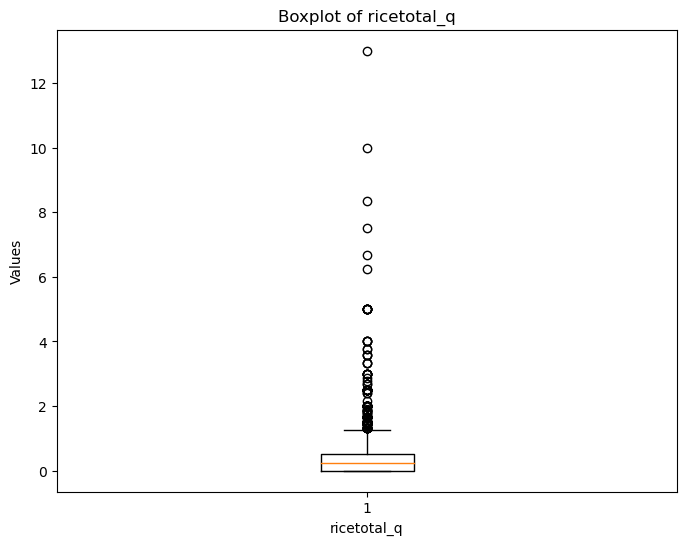

In [31]:
import matplotlib.pyplot as plt
# Assuming RJ_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(RJ_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [33]:
rice1 = RJ_clean['ricetotal_q'].quantile(0.25)
rice2 = RJ_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [37]:
RJ_clean=RJ_new[(RJ_new['ricetotal_q']<=up_limit)&(RJ_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2639a3f3090>,
 'caps': [<matplotlib.lines.Line2D at 0x2639a388c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2638a81fc50>],
 'medians': [<matplotlib.lines.Line2D at 0x2639a388390>],
 'fliers': [<matplotlib.lines.Line2D at 0x2639a38b510>],
 'means': []}

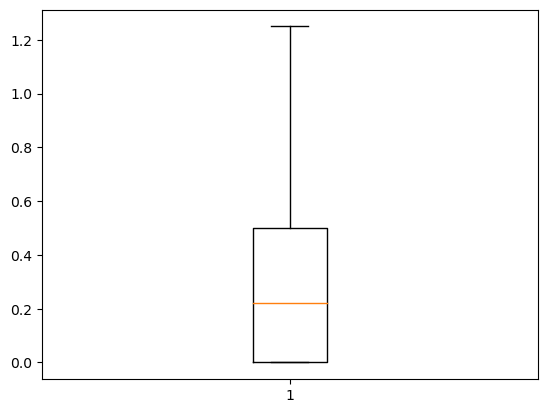

In [39]:
plt.boxplot(RJ_clean['ricetotal_q'])

In [41]:
RJ_clean['District'].unique()

array([12, 30, 23, 32, 31, 22, 13,  3,  1,  2,  4,  9, 10,  8, 11,  7,  6,
        5, 27, 21, 24, 26, 25, 20, 28, 19, 14, 29, 15, 18, 17, 16],
      dtype=int64)

In [45]:
# Replace values in the 'Sector' column
RJ_clean.loc[:,'Sector'] = RJ_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#total consumption

In [47]:
RJ_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [51]:
RJ_clean.loc[:, 'total_consumption'] = RJ_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [53]:
RJ_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
32036,RJ,12,RURAL,2,82,0.666667,6.666667,0.166667,0,0.000,0.133333,31.673632,33.333333,54.0,72.640298
32037,RJ,12,RURAL,2,82,0.071429,7.142857,0.142857,0,0.000,0.114286,23.378053,27.142857,59.0,57.992339
32038,RJ,12,RURAL,2,82,0.250000,7.500000,0.125000,0,0.125,0.000000,25.175390,10.000000,60.0,43.175390
32039,RJ,12,RURAL,2,82,0.400000,7.000000,0.000000,0,0.400,0.160000,20.182280,0.000000,60.0,28.142280
32040,RJ,12,RURAL,2,82,0.500000,5.000000,0.142857,0,0.000,0.000000,27.671691,10.000000,60.0,43.314549


In [55]:
RJ_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              32.640570  49.968634  492.109525  0.0
2              42.864497  61.669870  531.260920  0.0
3              44.608326  56.064365  657.007380  0.0
4              29.607550  52.187441  211.223800  0.0
5              38.970981  62.332580  572.954237  0.0

In [47]:
CHTSD_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                21.307476  49.021748  134.694228  30.467332
2                12.507373  41.721896  117.743645  19.451233
3                27.395103  48.933274  222.200000  17.125113
4                31.202745  54.161049  232.431630   0.000000
5                26.532139  47.520160  209.350233  22.333458
6                29.362535  52.972898  178.925212  15.571618
7                24.448006  48.069256  193.434323  22.764429
8                22.451994  48.942477  128.488338  10.900000
9                19.267597  45.707682  108.510255  15.000000
10               21.895811  47.382447  156.556612  18.500250
11               41.929085  58.699029  324.101410   0.250000
12               32.434139  57.941679  201.600500  17.833543
13               26.532226  50.757653  154.926640   0.000000
14               19.797711  50.454743  119.433704  15.000000
15               29.340258  49.615321  283.401220  18.650073
16               26.849435  53.721427  129.420455   0.000000
17               21.896704  45.856174  123.433667   0.000000
18               30.525468  46.445948  133.895828   0.000000

In [57]:
total_consumption_by_districtcode=RJ_clean.groupby('District')['total_consumption'].sum()

In [59]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
12    25136.212909
4     10597.673431
14    10500.203566
Name: total_consumption, dtype: float64

In [61]:
RJ_clean.loc[:,"District"] = RJ_clean.loc[:,"District"].replace({12: "Jaipur", 4: "Churu", 14: "Nagaur"})

In [63]:
total_consumption_by_districtname=RJ_clean.groupby('District')['total_consumption'].sum()

In [65]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Jaipur    25136.212909
Churu     10597.673431
Nagaur    10500.203566
Name: total_consumption, dtype: float64

In [67]:
from statsmodels.stats import weightstats as stests

In [69]:
rural=RJ_clean[RJ_clean['Sector']=="RURAL"]
urban=RJ_clean[RJ_clean['Sector']=="URBAN"]

In [71]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
32036,RJ,Jaipur,RURAL,2,82,0.666667,6.666667,0.166667,0,0.000,0.133333,31.673632,33.333333,54.0,72.640298
32037,RJ,Jaipur,RURAL,2,82,0.071429,7.142857,0.142857,0,0.000,0.114286,23.378053,27.142857,59.0,57.992339
32038,RJ,Jaipur,RURAL,2,82,0.250000,7.500000,0.125000,0,0.125,0.000000,25.175390,10.000000,60.0,43.175390
32039,RJ,Jaipur,RURAL,2,82,0.400000,7.000000,0.000000,0,0.400,0.160000,20.182280,0.000000,60.0,28.142280
32040,RJ,Jaipur,RURAL,2,82,0.500000,5.000000,0.142857,0,0.000,0.000000,27.671691,10.000000,60.0,43.314549


In [73]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
88500,RJ,23,URBAN,4,84,0.20,15.0,0.100000,0,0.0,0.0000,34.345397,23.205000,60.0,72.850397
88501,RJ,23,URBAN,4,84,0.25,10.0,0.250000,0,0.0,0.0625,26.150399,4.250000,58.0,40.962899
88502,RJ,23,URBAN,4,84,0.10,16.0,0.050000,0,0.0,0.0000,39.500760,40.000000,58.0,95.650760
88503,RJ,23,URBAN,4,84,0.05,14.0,0.020000,0,0.0,0.0000,36.780331,12.000000,52.0,62.850331
88504,RJ,23,URBAN,4,84,0.10,9.0,0.166667,0,0.0,0.0000,31.917043,8.333333,60.0,49.517043


In [75]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [77]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 7.645989273346268
P-Value: 2.073449535560885e-14
